# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) Introduction to Statistics and NumPy
Week 1 | Lesson 11 | creator: Matt Brems (DC)

### LEARNING OBJECTIVES
*After this lesson, you should be able to:*
- Differentiate between descriptive and inferential statistics
- Define and describe distributions
- Calculate measures of center and spread
- Install the NumPy library and use basic functions from NumPy

### Introduction to Statistics

**Intro:** What do you think of when you hear "statistics?"

Statistics is an incredibly broad area of study. The tools we learn in statistics (and, closely related, probability) underlie most of what we're going to do in DSI, even if we sometimes gloss over all of the technical details.

We can organize most of statistics into two large sub-fields: **descriptive** statistics and **inferential** statistics.

- **Descriptive statistics** focuses on summarizing, describing, and understanding data we observe.
- **Inferential statistics** focuses on generalizing results from a sample to a larger population.

For today, we're going to focus exclusively on _descriptive statistics._

Sometimes we want to look at two or more variables simultaneously - perhaps understanding how one changes when the other changes, or what one looks like when the other is held constant. We generally say that, when working with **multivariate statistics**, we are interested in **understanding the relationship** between two variables or among three or more variables.

Other times, we are only interested in one variable at a time. It does not make sense to say that we're interested in the relationship of one variable. Instead, we are interested in the **distribution** of that variable.

Formally, the **distribution of a variable describes all possible values of the variable and how frequently the variable takes on each of those values.**

We most frequently visualize these with a [histogram or a bar chart](https://www.mathsisfun.com/data/histograms.html). (We use histograms for quantitative data and bar charts for categorical data.)

Look at the following three histograms. With people in your row, take three minutes and decide how you might describe the data here to a boss or subject-matter expert who might not be familiar with what a histogram represents.

Histogram 1: ![](./assets/histogram_1.png)

Histogram 2: ![](./assets/histogram_2.png)

Histogram 3: ![](./assets/histogram_3.png)


_After three minutes, let's come together and discuss how you described each of the histograms._

When working with distributions, there are three broad questions we seek to answer:

1. What is the center of the distribution?
2. What is the spread about the center of the distribution?
3. What is the shape of the distribution of the data?

_Before moving forward, I'd like to get some data from you. Think about how many hours you slept last night. I'm going to save these as a variable._

In [66]:
sleep = [1,2,3,3]

### Measures of Center

There are a few ways we can measure the center of a distribution. You are likely familiar with mean, median, and mode, but we'll formally state these for now.

Suppose we have $n$ observed data points. I will represent all of our data as $x_1$, $x_2$, $x_3$, $\ldots$, $x_n$, where each $x_i$ is a separate data point.

The **mean** of a distribution, often denoted $\mu$ or $\bar{x}$, is calculated:

$$ \mu = \frac{\sum_{i=1}^n x_i}{n} $$

If we wanted to write a function to calculate the mean of a list, we could.

6.95
7.25


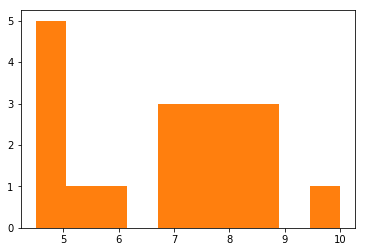

In [15]:
import numpy as np
import matplotlib.pyplot as plt
data = [8.5,7.5,7.5,7,8,8.5,8,8.5,5,5.5,5,7.5,7,5,4.5,6,8,10,5,7]
print(np.mean(data))
print(np.median(data))

plt.hist(data)
plt.show()

However, we can (and _reeeeeeeally should_) also use libraries to our benefit.

## Libraries

Recall from Installfest that Python is open source and that many people contribute to Python. Not surprisingly, people have found reasons to calculate the mean of a list of values before. When individuals contribute lots of code, they are often grouped in *libraries*.

Libraries will be vital to our success in this class and beyond. If we don't rely on others' code and continually have to write our own, we will be far less productive data scientists than we could be.

In [57]:
numpy.mean(sleep)

2.0

In [58]:
import numpy as np

In [59]:
np.mean(sleep)

2.0

The **median** of a distribution, often denoted $M$ or $m$, is calculated differently whether we have an odd number of observations or an even number of observations.

If we have an odd number of observations, we sort the observations from smallest to largest, then identify the middle observation.

If we have an even number of observations, we sort the observations from smallest to largest, then average the middle two observations.

If we wanted to write a function to calculate the median of a list, we could. As you can imagine, though, this would take a bit more time and energy than writing a function to calculate the mean of a list. (While not required, you might want to practice this on your own!)

In [61]:
np.median(sleep)

2.0

The **mode** of a distribution is simply the most frequently occurring observation in the dataset. If there are multiple distinct values that occur most frequently, both are considered modes.

While not required, you might want to practice writing a mode function on your own! I would venture to say that you would all tackle this problem a little bit differently, which is good.

In [68]:
from scipy.stats import mode ## There is a library called scipy with a module (sub-library) called stats.
## Rather than importing the entire scipy.stats module, we only want to import the mode function.

In [69]:
mode(sleep)

ModeResult(mode=array([3]), count=array([2]))

**So how do we know these commands are doing what we think they're doing?** [Let's check it out.](http://www.numpy.org/)

### Measures of Spread

There are a couple of methods by which we can measure the spread of a distribution. You've likely heard of range, variance, and standard deviation, but we'll formally state these for now as well.

Suppose we have $n$ observed data points. I will represent all of our data as $x_1$, $x_2$, $x_3$, $\ldots$, $x_n$, where each $x_i$ is a separate data point.

The **range** of a distribution is calculated:

$$ \max\{x_1,x_2,\ldots,x_n\} - \min\{x_1,x_2,\ldots,x_n\} $$

Yesterday we discussed creating a function for range and some of the computational challenges associated with that.

In [70]:
np.ptp(sleep) ## ptp refers to the acronym for "peak to peak."

2

If we want to quantify the spread of a distribution, one way we can do so is by finding (approximately) the average distance from each data point to the mean. We call this the **standard deviation**. For reasons that will be clear shortly, however, we'll start with **variance**.

The **variance** of a distribution, usually denoted $\sigma^2$ or $s^2$, is calculated:

$$ \sigma^2 = \frac{1}{n}\sum_{i=1}^n(x_i - \bar{x})^2 $$


Algorithm for Finding Variance:

1. Find the mean.
2. Take the difference of each observation and the mean.
3. Square each result from 2.
4. Sum each result from 3.
5. Divide the result in 4. by n, where $n$ is the number of observations.

*Note: If we're working with a sample instead of a population, we divide by $n-1$ instead of by $n$, but don't worry about that for now.*

**Check:** What might be some limitations of using this method?

The **standard deviation** of a distribution, usually denoted $\sigma$ or $s$, is calculated:

$$ \sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \bar{x})^2} $$


Algorithm for Finding Standard Deviation:

1. Find the mean.
2. Take the difference of each observation and the mean.
3. Square each result from 2.
4. Sum each result from 3.
5. Divide the result in 4. by n, where $n$ is the number of observations.
6. Take the square root of the result in 5.

*Note: If we're working with a sample instead of a population, we divide by $n-1$ instead of by $n$, but don't worry about that for now.*

In [ ]:
np.var(sleep)
np.std(sleep)

## Shapes of Distributions

When discussing shapes of distributions, there are really two main things for which we look:

- Do the data appear symmetric or skewed?
- How many modes (peaks) are there?

### Symmetric vs. Skewed
If approximately 50% of the distribution is below the mean and approximately 50% of the distribution is above the mean, we call that distribution **symmetric**. Otherwise, we call the distribution **skewed**.

One _rule of thumb_ is to see if the mean and median are close to one another. If the mean is approximately equal to the median, the distribution is usually symmetric. If the mean is significantly different from the median, we say that the distribution is skewed. 

- How far apart the mean and median are will, of course, depend on the scale of the data itself! As you can imagine, an annual income difference of 50 dollars is not much at all whereas a systolic blood pressure difference of 50 mmHg is quite substantial!
- This is a rule of thumb and, for distributions with more than one mode, may be misleading. Be careful using only this to decide the skew of a distribution. It is always better to plot during exploratory data analysis than relying on summary statistics alone!

Skewed distributions can be either **left-skewed** or **right-skewed**. Look for the "tail" of the distribution; if the tail is on the left, it's left-skewed! If the tail is on the right, it's right-skewed!

Check out the histogram of income from above: ![](./assets/histogram_3.png)

## Additional Resources

[This site](https://students.brown.edu/seeing-theory) is a great resource for the "shapes of distributions" as well as a lot of probability and statistics concepts we'll encounter over the coming weeks. You should take some time to play around with it!